### **CUSTOMER CHURN PREDICTION** 📈

Customer churn occurs when subscribers stop using a company’s services. In the telecom industry, churn rates reach 15–25% due to strong competition and easy switching between providers.

Retaining customers is cheaper than acquiring new ones, but personalized retention is costly at scale. Predictive models help identify high-risk customers so companies can focus efforts where it matters most.

Churn prediction requires a complete view of customer behavior across channels—purchases, service calls, store visits, online activity, and social media. By reducing churn, telecom firms not only protect market share but also boost profitability, since larger networks lower costs and increase returns.






### **objectives** :

The objective of this project is to analyze customer data to identify patterns and key factors that contribute to customer churn, and to build predictive models that can accurately forecast which customers are at risk of leaving. By leveraging data-driven insights, the project aims to help businesses implement proactive retention strategies — such as personalized offers, improved customer service, and targeted marketing — to reduce churn rates, increase customer lifetime value, and enhance overall business profitability.

### ***Data Cleaning***

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv('telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
df.shape

(7043, 21)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [50]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [52]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [53]:
#removing rows with missing values because they are the ones with 0 tenure 
df = df[df.TotalCharges.notnull()]
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [55]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### ***Exploratory Data Analysis***

#### **1) Based on Demographics**

##### a. Gender Distribution

In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

##### b. Age Distribution

Text(0.5, 1.0, '% of Senior Citizens')

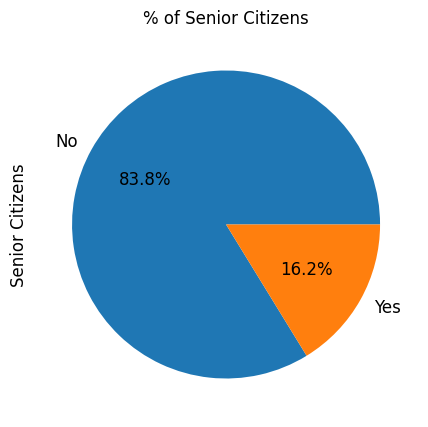

In [57]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

#### **2) Based on Customer Account Information**

##### a. Tenure

C:\Users\damie\AppData\Local\Temp\ipykernel_23176\2309406470.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, '# of Customers by their tenure')

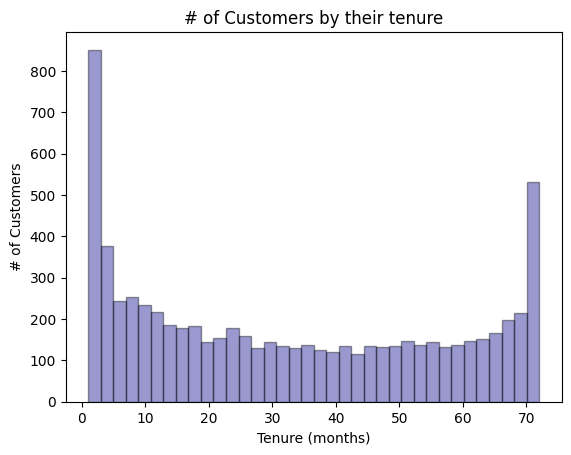

In [58]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

C:\Users\damie\AppData\Local\Temp\ipykernel_23176\2876585228.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\damie\AppData\Local\Temp\ipykernel_23176\2876585228.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\damie\AppData\Local\Temp\ipykernel_23176\2876585228.py:4: UserWarning:



`distplot` is

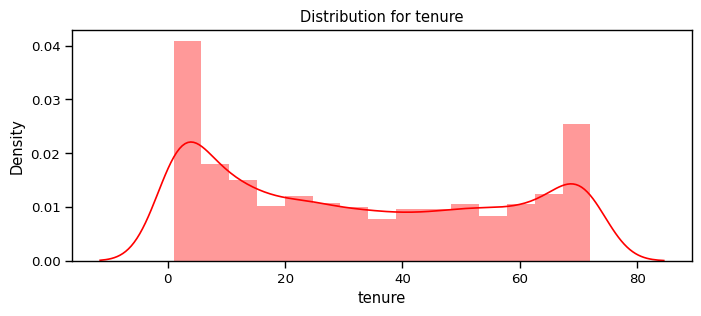

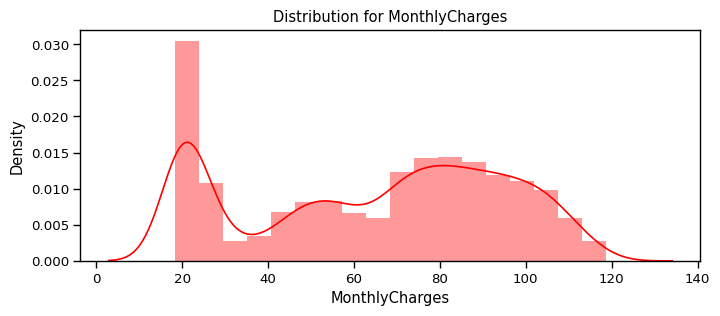

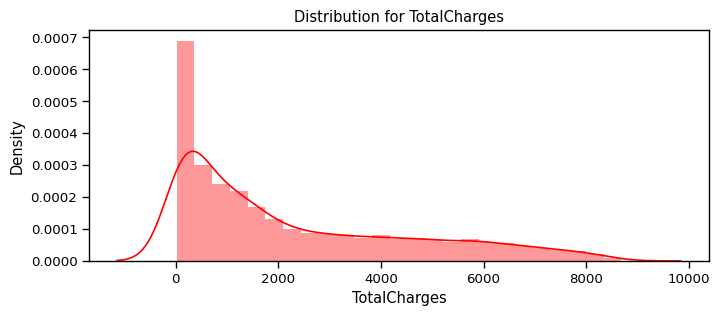

In [90]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
    
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

##### b. Contract Type

Text(0.5, 1.0, '# of Customers by Contract Type')

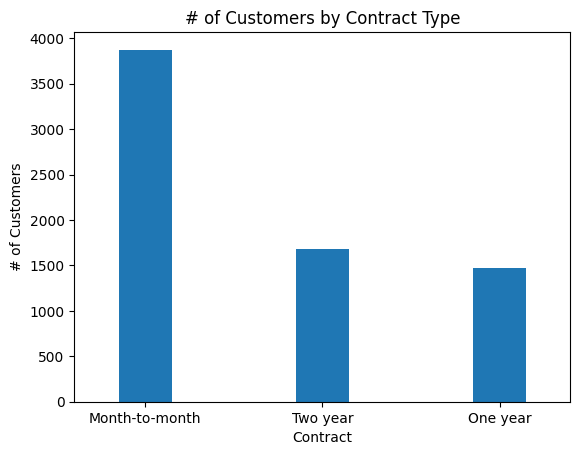

In [59]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

C:\Users\damie\AppData\Local\Temp\ipykernel_23176\238609947.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\damie\AppData\Local\Temp\ipykernel_23176\238609947.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\damie\AppData\Local\Temp\ipykernel_23176\238609947.py:22: UserWarning:



`distplot` is 

Text(0.5, 1.0, 'Two Year Contract')

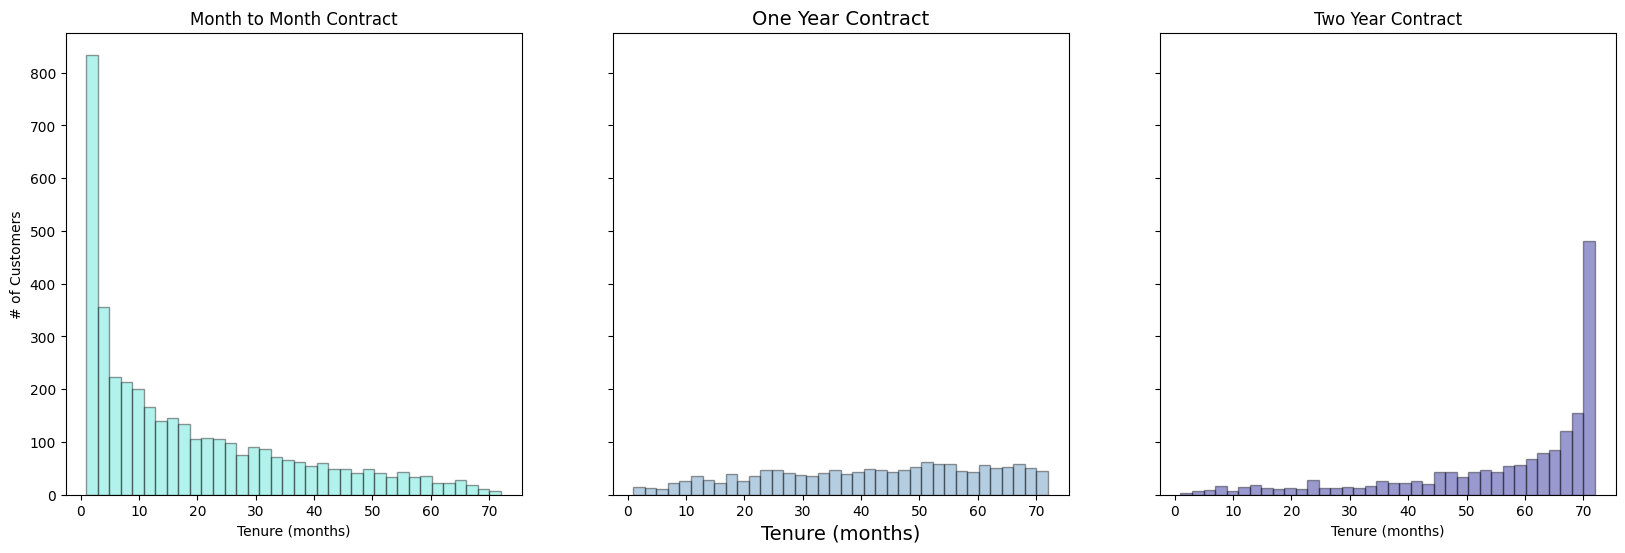

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')



Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

##### c. Payment Method

In [61]:
import plotly.graph_objects as go

labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

#### **3)Based on Churn Rate**

In [63]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
#Creating a copy of the dataframe to perform feature engineering

df2 = df.copy()
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

C:\Users\damie\AppData\Local\Temp\ipykernel_23176\1666103170.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\damie\AppData\Local\Temp\ipykernel_23176\1666103170.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

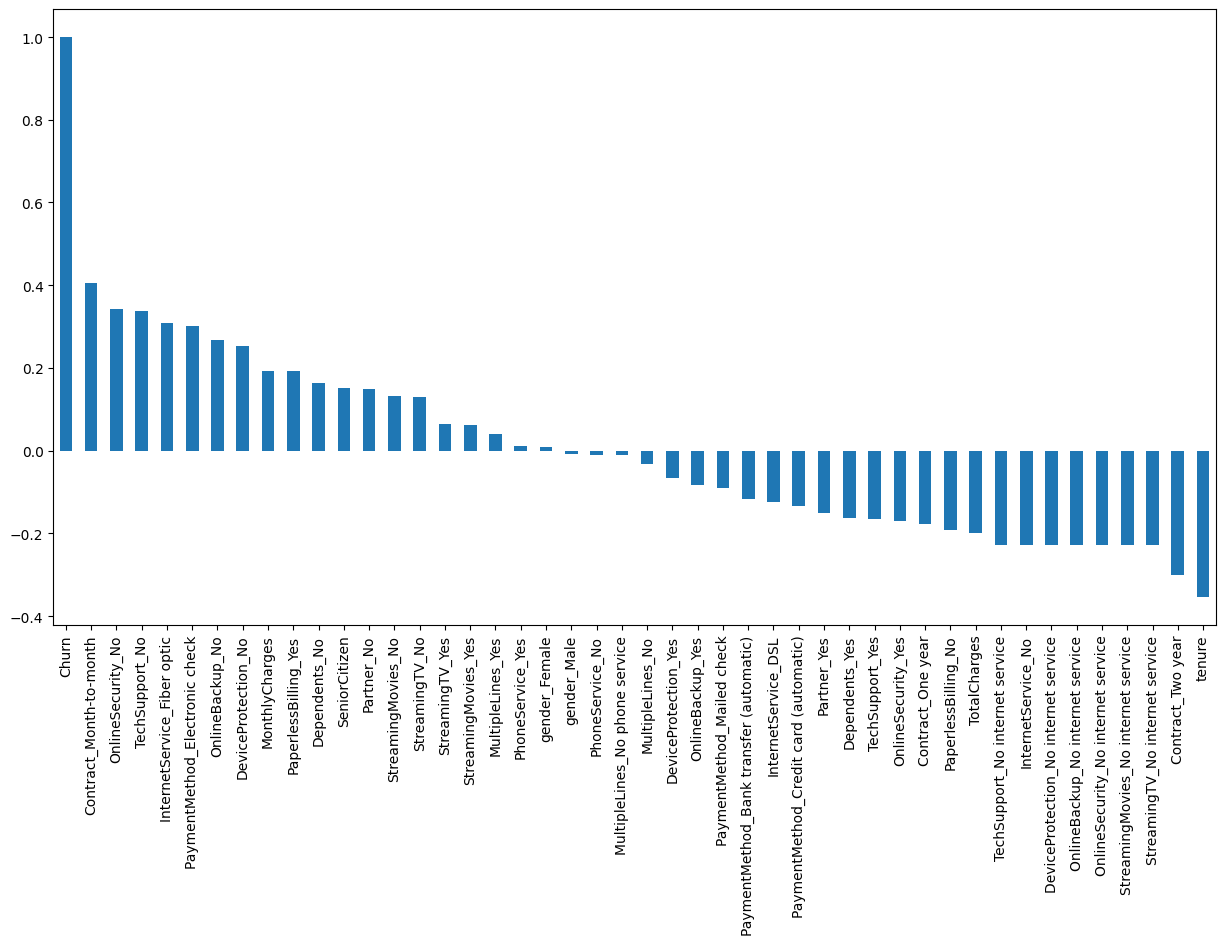

In [65]:
# Correlation of "Churn" with other variables
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

From the visualization, month-to-month contracts, absence of online security, lack of technical support, and electronic check payment method are strongly linked with higher churn rates. On the other hand, longer tenure, two-year contracts, and automatic payment methods are associated with lower churn. These insights indicate that short-term customers without service add-ons or security features are more likely to leave, while long-term, committed customers tend to stay.

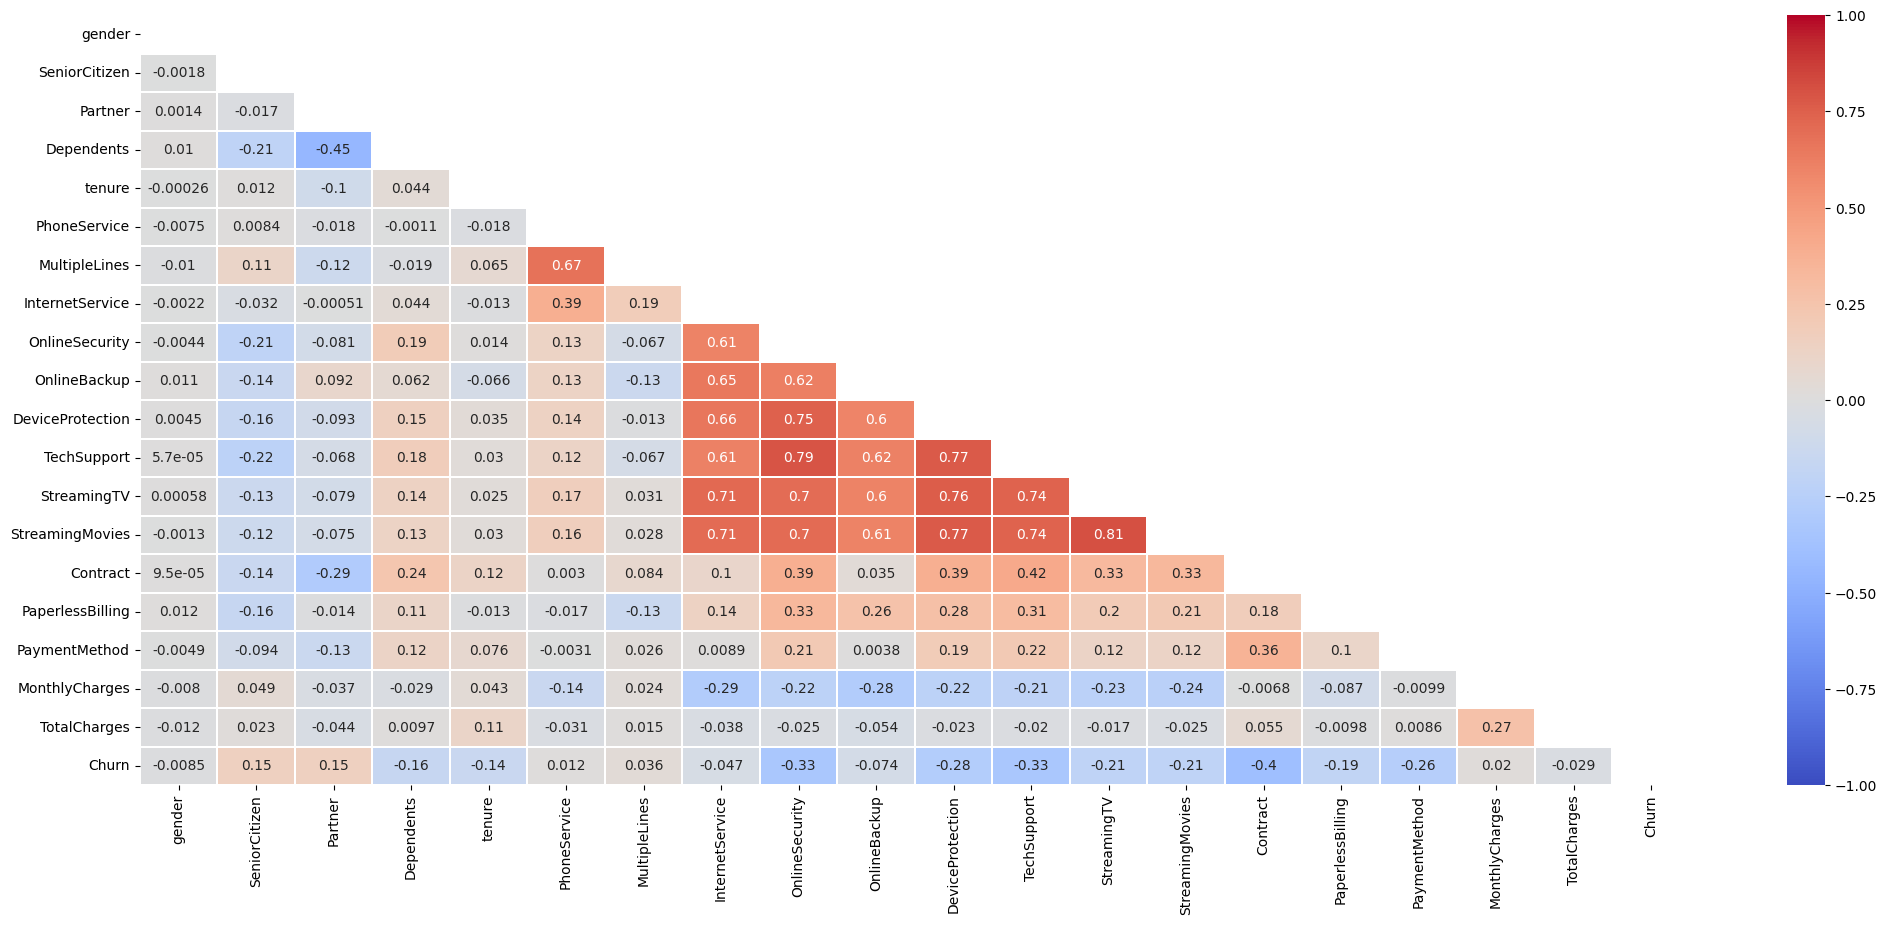

In [66]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

From the chart, monthly contracts, higher monthly charges, and lack of online security or tech support show moderate positive correlations with churn—suggesting customers with these characteristics are more likely to leave. In contrast, longer tenure, two-year contracts, and total charges have negative correlations with churn, indicating they are retention factors. Additionally, service features such as online backup, device protection, and tech support are highly correlated with each other, meaning customers who subscribe to one often use the others.

Overall, the heatmap reinforces that contract type, service add-ons, and tenure are the strongest drivers of customer churn behavior.

##### a. Churn by Gender

In [68]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [69]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [70]:
#plot churn distribution with respect to gender

import plotly.express as px

fig = px.histogram(df, x="gender", color="Churn", barmode="group",
                   title="Churn Distribution by Gender")

fig.show()


##### b. Churn by Contract type

In [71]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

##### c. Churn by Payment Method

In [72]:
import plotly.express as px

fig = px.histogram(df, 
                   x="PaymentMethod", 
                   color="Churn", 
                   barmode="stack",
                   text_auto=True,  # show counts on bars
                   title="<b>Customer Payment Method Distribution w.r.t. Churn</b>")

fig.update_layout(
    width=800, height=500, 
    bargap=0.2,
    xaxis=dict(tickangle=0, title="Payment Method"),  # straighten labels
    yaxis=dict(title="Number of Customers"),
    legend_title="Churn Status",
    title_x=0.5  # center title
)

fig.show()


##### d. Churn by Internet Service

In [73]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [74]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [75]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

##### e. Churn by dependent distribution

In [76]:
color_map = {"Yes": "#0D88F3", "No": "#E76712"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

##### f. Churn by Partner distribution

In [77]:
color_map = {"Yes": "#E33809", "No": "#042F50"}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

##### g. Churn by age distribution

In [78]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

color_map = {"Yes": "#72727B", "No": "#C65606"}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

##### h. Churn by Online security

In [79]:
color_map = {"Yes": "#1F77B4", "No": "#FF7F0E"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

##### i. Churn by Paperless billing

In [80]:
color_map = {"Yes": "#1F77B4", "No": "#FF7F0E"}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

##### j. Churn by Tech Support

In [81]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

##### k. Churn by Phone Service

In [82]:
color_map = {"Yes": "#1F77B4", "No": "#FF7F0E"}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

##### l. Churn by Monthly charges

C:\Users\damie\AppData\Local\Temp\ipykernel_23176\2576396580.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\damie\AppData\Local\Temp\ipykernel_23176\2576396580.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




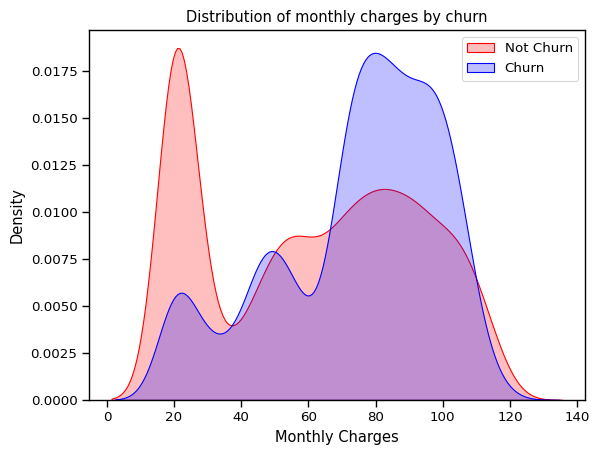

In [83]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

##### m. Churn by Total Charges

C:\Users\damie\AppData\Local\Temp\ipykernel_23176\2062861112.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\damie\AppData\Local\Temp\ipykernel_23176\2062861112.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




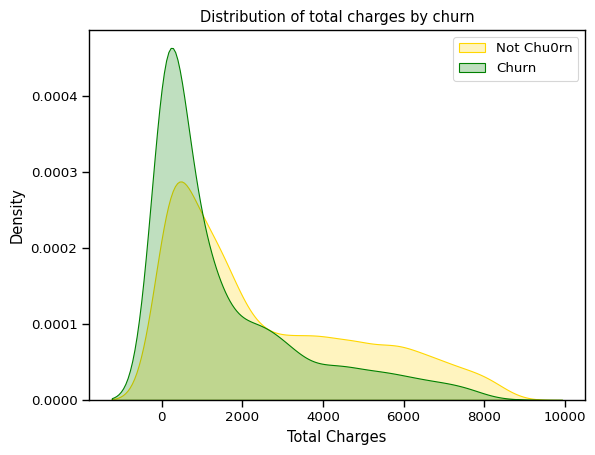

In [84]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

##### n. Churn by Tenure

In [85]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

It clearly shows that customers who did not churn tend to have significantly longer tenures, with a median around 37 months, while churned customers mostly have short tenures, typically under 12 months. This suggests that newer customers are more likely to leave, whereas long-term customers are more loyal and stable. The presence of outliers among churned customers indicates a few long-term users who still left, possibly due to service dissatisfaction or pricing issues. 

Overall, tenure is a strong negative predictor of churn. The longer a customer stays, the less likely they are to leave.

### **Data Pre-processing**


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
#Preparing the data for the model

from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [88]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [ ]:
#train-test split

from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)



### **Building Predictive Models**

#### **1. K-Nearest Neighbours Classifier (KNN)**

In [91]:
# 1. KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7819905213270142


In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_y)) 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



##### **Insights**
* The model predicts class 0 (majority class) well (high precision & recall).

* The model struggles with class 1 (minority class) (low recall = many false negatives).

* Overall accuracy = 78%, but the model is biased toward the majority class.

* Weighted metrics are higher than macro because class 0 dominates the dataset.

#### **2. Support Vector Classifier (SVC)**

In [93]:
# 2. SVC
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7341232227488151


In [94]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##### **Insights**
* Your dataset is imbalanced (1549 vs 561).

* Accuracy is misleading → it looks okay, but the minority class performance is terrible.

* You need techniques to handle imbalance

#### **3. Random Forest Classifier**

In [95]:
# 3. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8132701421800947


In [96]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



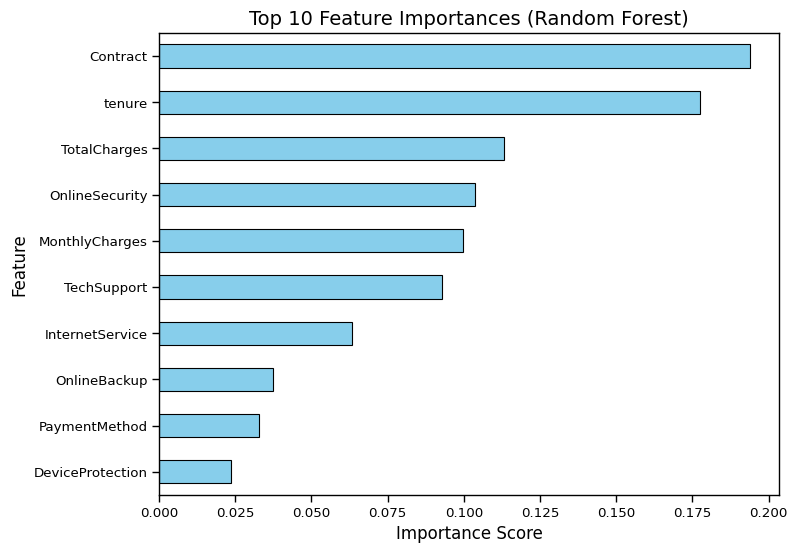

In [97]:

importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns)

# Get top 10 features
top_features = weights.sort_values(ascending=True)[-10:]

# Plot horizontal bar chart
plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


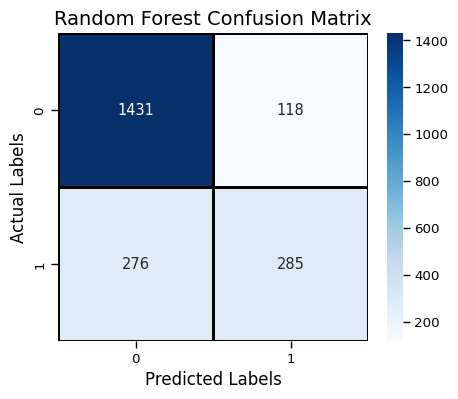

In [98]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            linewidths=2, linecolor="black")
plt.title("Random Forest Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.show()


The model correctly identified 1,431 non-churners (True Negatives) and 285 churners (True Positives). However, it also misclassified 118 non-churners as churners (False Positives) and missed 276 actual churners (False Negatives). While the model performs very well at recognizing customers who stay, it struggles somewhat with detecting those who actually leave, a common issue in imbalanced churn datasets. 

This indicates that the Random Forest model prioritizes accuracy over recall, making it reliable for overall prediction but less effective for targeting at-risk customers.

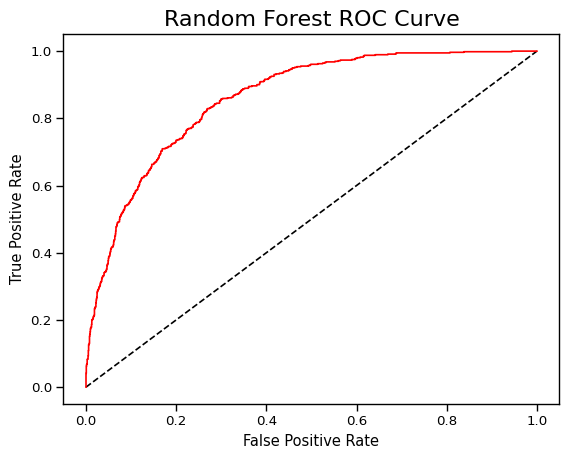

In [99]:
from sklearn.metrics import roc_curve

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

The ROC curve for the Random Forest model demonstrates strong predictive performance in distinguishing between churners and non-churners. 

The curve rises sharply toward the top-left corner, indicating a high true positive rate and a low false positive rate across various thresholds. The model’s AUC (Area Under the Curve) is approximately 0.85, which signifies that it correctly ranks about 85% of churn–non-churn pairs. In simple terms, this means the Random Forest model performs well at differentiating customers who are likely to leave from those who will stay, making it a reliable choice for churn prediction and early customer retention efforts.

##### **Insights**
* Overall accuracy looks good, but care is needed because minority class performance is lower

* Model is strong at predicting the majority class (0).

* Contract and tenure are the most important features

#### **4. Logistic Regression**

In [100]:
# 4. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8042654028436019


c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [101]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.57      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



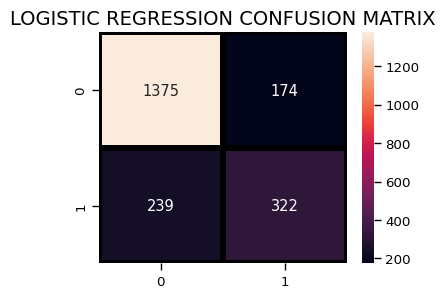

In [102]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

The model correctly identified 1,375 non-churners (True Negatives) and 322 churners (True Positives). However, it also misclassified 174 non-churners as churners (False Positives) and missed 239 actual churners (False Negatives). While the model performs very well at recognizing customers who stay, it struggles somewhat with detecting those who actually leave, a common issue in imbalanced churn datasets. 

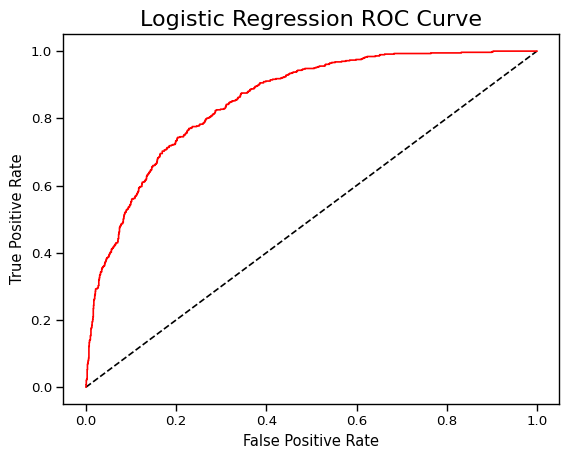

In [103]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

The ROC curve for the Logistic regression model demonstrates strong predictive performance in distinguishing between churners and non-churners. 

 The model’s AUC (Area Under the Curve) is approximately 0.80, which signifies that it correctly ranks about 85% of churn–non-churn pairs. 

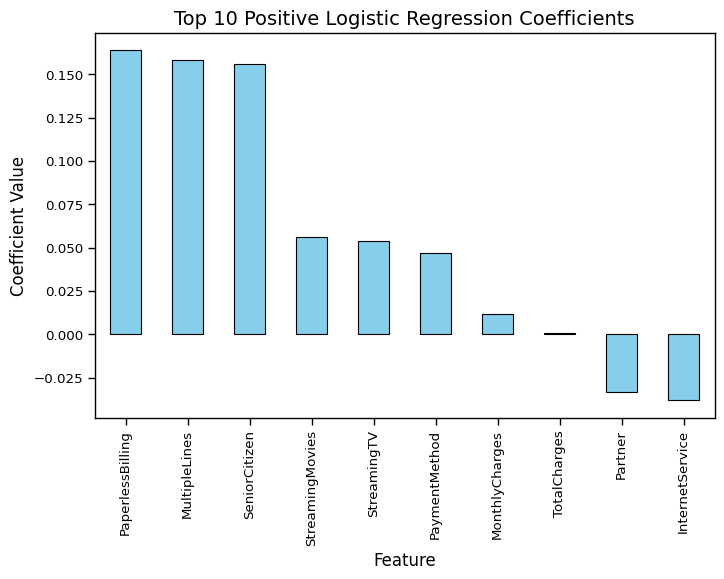

In [104]:


# Convert coefficients to a Series
weights = pd.Series(lr_model.coef_[0], index=X.columns)

# Sort descending and pick top 10
top_features = weights.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(8,5))
top_features.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Positive Logistic Regression Coefficients", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.show()


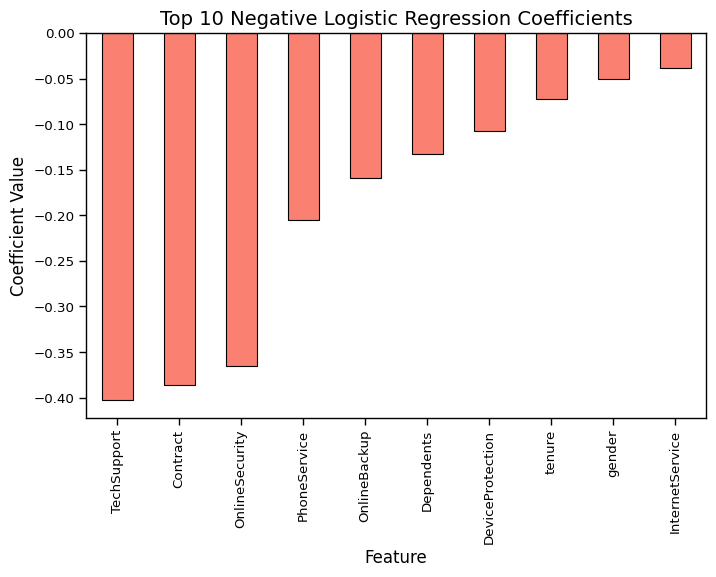

In [105]:


# Bottom 10 coefficients (most negative impact)
bottom_features = weights.sort_values()[:10]  # sort ascending, pick first 10

plt.figure(figsize=(8,5))
bottom_features.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Top 10 Negative Logistic Regression Coefficients", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.show()


##### **Insights**
* Overall accuracy looks good, but care is needed because minority class performance is lower

* Model is strong at predicting the majority class (0).

* Papaerless-Billings and Senior citizens are the most important features

#### **5. Decision Tree Classifier**

In [106]:
# 5. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7331753554502369


In [107]:

print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1549
           1       0.50      0.54      0.52       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.67      2110
weighted avg       0.74      0.73      0.74      2110



##### **Insights**
* Overall accuracy looks good, but care is needed because minority class performance is lower

* Model is strong at predicting the majority class (0).

* Handle imbalance between the classes

#### **6. Adaptive Boosting (ADA)**

In [108]:
# 6. ADA Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8127962085308057

In [109]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.68      0.56      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.75      2110
weighted avg       0.81      0.81      0.81      2110



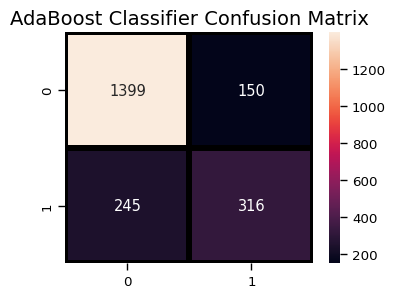

In [110]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

The model correctly identified 1,399 non-churners (True Negatives) and 316 churners (True Positives). However, it also misclassified 150 non-churners as churners (False Positives) and missed 245 actual churners (False Negatives). While the model performs very well at recognizing customers who stay, it struggles somewhat with detecting those who actually leave, a common issue in imbalanced churn datasets. 

##### **Insights**
* Overall accuracy looks good, but care is needed because minority class performance is lower

* Model is strong at predicting the majority class (0).

* Handle imbalance between the classes

#### **7. Gradient Boosting Classifier**

In [111]:
# 7. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8075829383886256


In [112]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



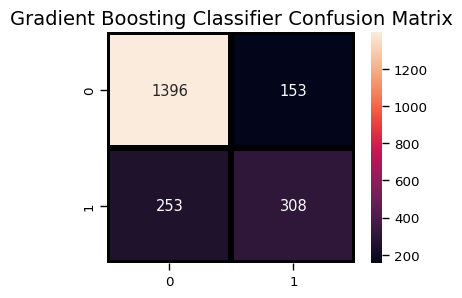

In [113]:


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()



The model correctly identified 1,396 non-churners (True Negatives) and 308 churners (True Positives). However, it also misclassified 153 non-churners as churners (False Positives) and missed 253 actual churners (False Negatives). While the model performs very well at recognizing customers who stay, it struggles somewhat with detecting those who actually leave, a common issue in imbalanced churn datasets. 

##### **Insights**
* Overall accuracy looks good, but care is needed because minority class performance is lower

* Model is strong at predicting the majority class (0).

* Handle imbalance between the classes

#### **8. Extreme Gradient Boosting Classifier (XGBoost)**

In [114]:
# 8. XGBoost Classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7824644549763033

In [115]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1549
           1       0.60      0.55      0.57       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



##### **Insights**
* Overall accuracy looks good, but care is needed because minority class performance is lower

* Model is strong at predicting the majority class (0).

* Handle imbalance between the classes

#### **9. Voting Classifier**

In [116]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn_model),
    # ('svc', svc_model),
    ('rf', model_rf),
    ('lr', lr_model),
    ('dt', dt_model),
    ('ada', a_model),
    ('gb', gb),
    ('xgb', model)
], voting="soft")
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
print("Voting Classifier accuracy is :",metrics.accuracy_score(y_test, voting_pred))

c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Voting Classifier accuracy is : 0.8018957345971564


In [117]:
print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.53      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



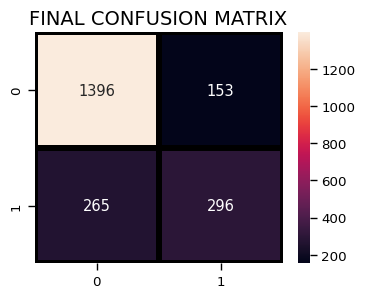

In [118]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, voting_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

The model correctly identified 1,396 non-churners (True Negatives) and 296 churners (True Positives). However, it also misclassified 153 non-churners as churners (False Positives) and missed 265 actual churners (False Negatives). While the model performs very well at recognizing customers who stay, it struggles somewhat with detecting those who actually leave, a common issue in imbalanced churn datasets. 

##### **Insights**
* Overall accuracy looks good, but care is needed because minority class performance is lower

* Model is strong at predicting the majority class (0).

* Handle imbalance between the classes

#### **10. Stacking Classifier**

In [119]:
# Stacking Classifier
from sklearn.ensemble import StackingClassifier

# Define base learners
base_estimators = [
    ('knn', knn_model),
    ('svc', SVC(probability=True, random_state=42)),  # must allow probas
    ('rf', model_rf),
    ('dt', dt_model),
    ('ada', a_model),
    ('gb', gb),
    ('xgb', model)  # your XGBoost model
]

# Define meta-learner (Logistic Regression is common)
meta_model = LogisticRegression(max_iter=1000)

# Build stacking classifier
stack_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    cv=5,                # cross-validation to reduce overfitting
    stack_method='auto', # automatically chooses predict_proba for classifiers
    n_jobs=-1
)

# Train
stack_clf.fit(X_train, y_train)

# Predict
stack_pred = stack_clf.predict(X_test)

# Evaluate
print("Stacking Classifier accuracy is :", metrics.accuracy_score(y_test, stack_pred))


Stacking Classifier accuracy is : 0.8118483412322275


In [120]:
print(classification_report(y_test, stack_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.68      0.55      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



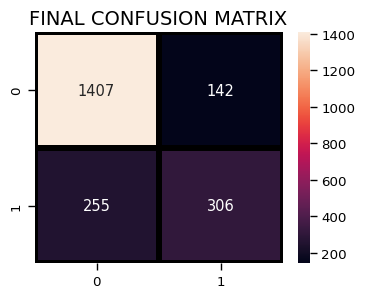

In [121]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, stack_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

The model correctly identified 1,407 non-churners (True Negatives) and 306 churners (True Positives). However, it also misclassified 142 non-churners as churners (False Positives) and missed 255 actual churners (False Negatives). While the model performs very well at recognizing customers who stay, it struggles somewhat with detecting those who actually leave, a common issue in imbalanced churn datasets. 

##### **Insights**
* Overall accuracy looks good, but care is needed because minority class performance is lower

* Model is strong at predicting the majority class (0).

* Handle imbalance between the classes

#### ***Model Comparison***

In [122]:


# ✅ Initialize results dictionary BEFORE the loop
results = {}

# Example models dictionary
models = {
    "KNN": knn_model,
    "SVC": svc_model,
    "Random Forest": model_rf,
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "AdaBoost": a_model,
    "Gradient Boosting": gb,
    "XGBoost": model
}

# ✅ Loop through each model
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    
    # ✅ Save results INSIDE the loop
    results[name] = acc
    
    # Print as you go (optional)
    #print(f"{name} accuracy: {acc:.4f}")

# ✅ After the loop, results will contain ALL models
#print("\nFinal Results Dictionary:", results)

results["Voting"] = metrics.accuracy_score(y_test, voting_pred)

results["Stacking"] = metrics.accuracy_score(y_test, stack_pred)

df_results = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison:\n", df_results)

c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Model Comparison:
                      Accuracy
Random Forest        0.813270
AdaBoost             0.812796
Stacking             0.811848
Gradient Boosting    0.807583
Logistic Regression  0.804265
Voting               0.801896
XGBoost              0.782464
KNN                  0.781991
SVC                  0.734123
Decision Tree        0.727014


In [ ]:

# Visualize model performance using Plotly

fig = px.bar(
    df_results.reset_index(),
    x="Accuracy", 
    y="index",
    text="Accuracy",
    color="Accuracy",
    color_continuous_scale="Blues",
    orientation="h",
    title="Model Performance Comparison"
)

fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')

# ✅ Sort y-axis (model names) by Accuracy descending
fig.update_layout(
    xaxis_title="Accuracy",
    yaxis_title="Model",
    width=800,
    height=600,
    showlegend=False,
    yaxis=dict(autorange="reversed")  # so highest Accuracy is at top
)

fig.show()


In [ ]:
#checking the models used

print(list(models.keys()))


['KNN', 'SVC', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost']


In [ ]:
#Checking the ids of the models to ensure they are different instances

models = {
    "KNN": knn_model,
    "SVC": svc_model,
    "Random Forest": model_rf,
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "AdaBoost": a_model,
    "Gradient Boosting": gb,
    "XGBoost": model
}

print("Estimator IDs (check if any are identical):")
for name, est in models.items():
    print(f"{name}: {id(est)}")


Estimator IDs (check if any are identical):
KNN: 2328535591504
SVC: 2328535582768
Random Forest: 2328535583776
Logistic Regression: 2328572309776
Decision Tree: 2328727764432
AdaBoost: 2328727932752
Gradient Boosting: 2328534544608
XGBoost: 2328534542256


In [ ]:
# Comprehensive Model Evaluation with Multiple Metrics


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ✅ Initialize results dictionary BEFORE the loop
results = {}

# Example models dictionary
models = {
    "KNN": knn_model,
    "SVC": svc_model,
    "Random Forest": model_rf,
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "AdaBoost": a_model,
    "Gradient Boosting": gb,
    "XGBoost": model
}

# ✅ Loop through each model
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    # For models that support probability outputs
    if hasattr(m, "predict_proba"):
        y_proba = m.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None  # some models (like plain SVC) may not have this
    
    # Compute other metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # ✅ Save results inside the loop
    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# ✅ Add Voting and Stacking results (if already predicted)
results["Voting"] = {
    "Accuracy": accuracy_score(y_test, voting_pred),
    "Precision": precision_score(y_test, voting_pred, zero_division=0),
    "Recall": recall_score(y_test, voting_pred, zero_division=0),
    "F1-Score": f1_score(y_test, voting_pred, zero_division=0),
    "ROC-AUC": None  # Only available if you used voting='soft'
}

results["Stacking"] = {
    "Accuracy": accuracy_score(y_test, stack_pred),
    "Precision": precision_score(y_test, stack_pred, zero_division=0),
    "Recall": recall_score(y_test, stack_pred, zero_division=0),
    "F1-Score": f1_score(y_test, stack_pred, zero_division=0),
    "ROC-AUC": None
}

# ✅ Convert to DataFrame
df_results = pd.DataFrame(results).T  # transpose so models are rows
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# ✅ Display
print("\nModel Comparison:\n")
print(df_results.round(4))


c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Model Comparison:

                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Random Forest          0.8133     0.7072  0.5080    0.5913   0.8597
AdaBoost               0.8128     0.6781  0.5633    0.6154   0.8609
Stacking               0.8118     0.6830  0.5455    0.6065      NaN
Gradient Boosting      0.8076     0.6681  0.5490    0.6027   0.8587
Logistic Regression    0.8043     0.6492  0.5740    0.6093   0.8541
Voting                 0.8019     0.6592  0.5276    0.5861      NaN
XGBoost                0.7825     0.5996  0.5472    0.5722   0.8279
KNN                    0.7820     0.6278  0.4421    0.5188   0.7858
SVC                    0.7341     0.0000  0.0000    0.0000      NaN
Decision Tree          0.7237     0.4814  0.5062    0.4935   0.6554


In [ ]:
# Highlight the best performance in each metric
df_styled = df_results.style.highlight_max(axis=0, color='darkgreen')
df_styled


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.813270,0.707196,0.508021,0.591286,0.859698
AdaBoost,0.812796,0.678112,0.563280,0.615385,0.860880
Stacking,0.811848,0.683036,0.545455,0.606541,nan
Gradient Boosting,0.807583,0.668113,0.549020,0.602740,0.858670
Logistic Regression,0.804265,0.649194,0.573975,0.609272,0.854055
Voting,0.801896,0.659243,0.527629,0.586139,nan
XGBoost,0.782464,0.599609,0.547237,0.572227,0.827933
KNN,0.781991,0.627848,0.442068,0.518828,0.785822
SVC,0.734123,0.000000,0.000000,0.000000,nan
Decision Tree,0.723697,0.481356,0.506239,0.493484,0.655442


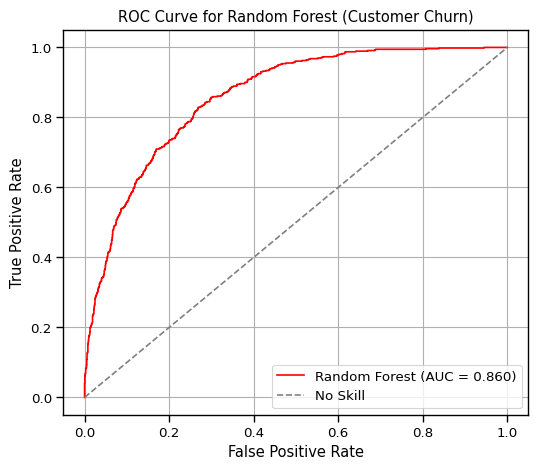

In [ ]:
# Plotting ROC Curve for the Best Model (Random Forest)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn = 1)
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='red', label=f'Random Forest (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (Customer Churn)')
plt.legend()
plt.grid(True)
plt.show()


The model achieves an Area Under the Curve (AUC) of 0.860, which is significantly better than the "No Skill" baseline (represented by the dashed diagonal line). An AUC of 0.860 indicates a strong ability to distinguish between customers who will churn and those who won't, as the curve generally bows well up into the top-left corner of the plot, demonstrating a high True Positive Rate for relatively low False Positive Rates.

#### ***Hyperparameter Tuning (Random Forest & ADA-Boost)***

In [ ]:
Hyperparameter Tuning for Random Forest and AdaBoost Classifier


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(random_state=1),
    param_grid = rf_param_grid,
    scoring = 'recall',       # Focus on recall (catch more churners)
    cv = 5,                   # 5-fold cross-validation
    n_jobs = -1,              # Use all CPU cores
    verbose = 2
)

rf_grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Recall Score:", rf_grid.best_score_)



In [ ]:
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
}

ab_grid = GridSearchCV(
    estimator = AdaBoostClassifier(random_state=1),
    param_grid = ab_param_grid,
    scoring = 'recall',   # again focus on recall
    cv = 5,
    n_jobs = -1,
    verbose = 2
)

ab_grid.fit(X_train, y_train)
print("Best AdaBoost Parameters:", ab_grid.best_params_)
print("Best Recall Score:", ab_grid.best_score_)


In [ ]:
best_rf = rf_grid.best_estimator_
best_ab = ab_grid.best_estimator_

for model_name, model in [("Random Forest", best_rf), ("AdaBoost", best_ab)]:
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]

    print(f"\n📊 {model_name} Performance:")
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1-score:", metrics.f1_score(y_test, y_pred))
    print("ROC-AUC:", metrics.roc_auc_score(y_test, y_pred_prob))


### **Identify Key Churn Factors (Feature Importance)**

C:\Users\damie\AppData\Local\Temp\ipykernel_23176\3754529504.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




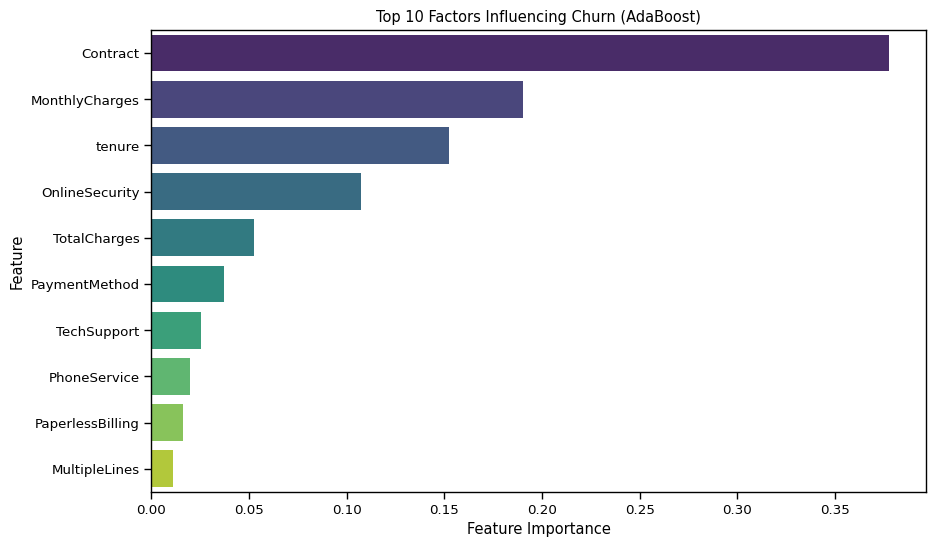

,Feature,Importance
14,Contract,0.377830
17,MonthlyCharges,0.190208
4,tenure,0.152528
8,OnlineSecurity,0.107290
18,TotalCharges,0.052453
16,PaymentMethod,0.037371
11,TechSupport,0.025642
5,PhoneService,0.019605
15,PaperlessBilling,0.016338
6,MultipleLines,0.011377


In [132]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': a_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Factors Influencing Churn (AdaBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

feature_importance.head(10)

### **Flag Likely Churners**

In [133]:
# If the original CustomerID is gone, create one using row numbers
df.reset_index(drop=True, inplace=True)  # ensure sequential index
df['CustomerID'] = df.index + 1  # start IDs from 1

# Predict churn probability with your AdaBoost model
df['churn_probability'] = a_model.predict_proba(X)[:, 1]

# Flag high-risk churners
threshold = 0.45
df['churn_flag'] = (df['churn_probability'] >= threshold).astype(int)

# Optional: Assign retention action
def retention_strategy(prob):
    if prob >= 0.7:
        return 'High Risk - Offer 30% Discount'
    elif prob >= 0.4:
        return 'Medium Risk - Offer Retention Call'
    else:
        return 'Low Risk - Normal Monitoring'

df['Retention_Action'] = df['churn_probability'].apply(retention_strategy)

# Preview
df[['CustomerID', 'churn_probability', 'churn_flag', 'Retention_Action']].head(10)


,CustomerID,churn_probability,churn_flag,Retention_Action
0,1,0.588043,1,Medium Risk - Offer Retention Call
1,2,0.292606,0,Low Risk - Normal Monitoring
2,3,0.452631,1,Medium Risk - Offer Retention Call
3,4,0.295905,0,Low Risk - Normal Monitoring
4,5,0.565817,1,Medium Risk - Offer Retention Call
5,6,0.572125,1,Medium Risk - Offer Retention Call
6,7,0.478386,1,Medium Risk - Offer Retention Call
7,8,0.412767,0,Medium Risk - Offer Retention Call
8,9,0.522407,1,Medium Risk - Offer Retention Call
9,10,0.267185,0,Low Risk - Normal Monitoring


### ***Handing imbalances (ADA-boost Classifier)***

In [135]:


from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Before SMOTE: {pd.Series(y_train).value_counts().to_dict()}")
print(f"After SMOTE: {pd.Series(y_train_res).value_counts().to_dict()}")

Before SMOTE: {0: 3614, 1: 1308}
After SMOTE: {1: 3614, 0: 3614}


In [136]:
# Step 2: Train AdaBoost model (you can also include your best params)
a_model = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=1,
    random_state=42
)

a_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=42)

In [137]:
# Step 3: Predictions and evaluation
a_preds = a_model.predict(X_test)
a_probs = a_model.predict_proba(X_test)[:,1]

print("\n📊 AdaBoost Classifier Performance:")
print("Accuracy:", metrics.accuracy_score(y_test, a_preds))
print("ROC-AUC:", roc_auc_score(y_test, a_probs))
print("\nClassification Report:\n", classification_report(y_test, a_preds))


📊 AdaBoost Classifier Performance:
Accuracy: 0.7639810426540284
ROC-AUC: 0.8482132685223864

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1549
           1       0.54      0.73      0.62       561

    accuracy                           0.76      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.76      0.77      2110



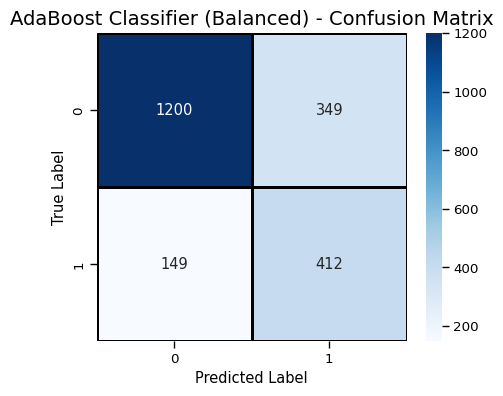

In [138]:
# Step 4: Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, a_preds),
            annot=True, fmt="d", cmap="Blues", linecolor="k", linewidths=2)
plt.title("AdaBoost Classifier (Balanced) - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


🔍 Model Comparison (Including Support Counts):

                       Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
0        Imbalanced AdaBoost    0.8104     0.6754  0.5526    0.6078   0.8610   
1  Balanced (SMOTE) AdaBoost    0.7640     0.5414  0.7344    0.6233   0.8482   

   Support (No Churn)  Support (Churn)  
0                1549              561  
1                1549              561  


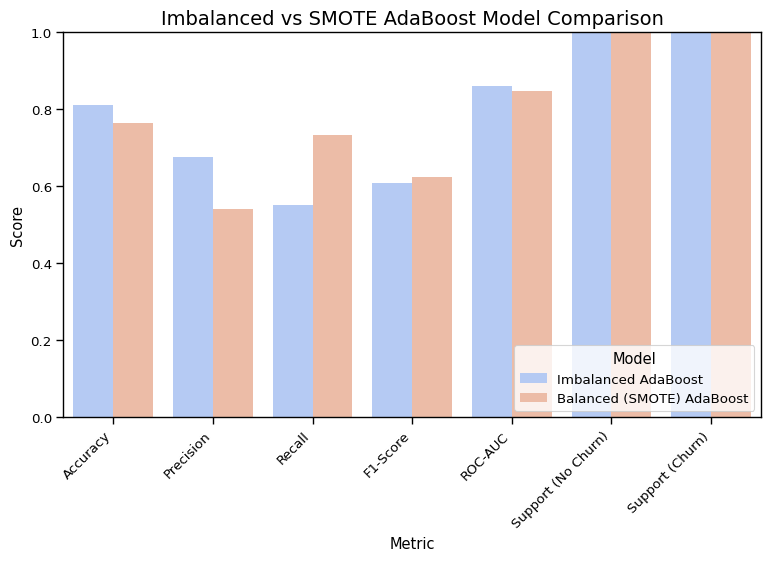

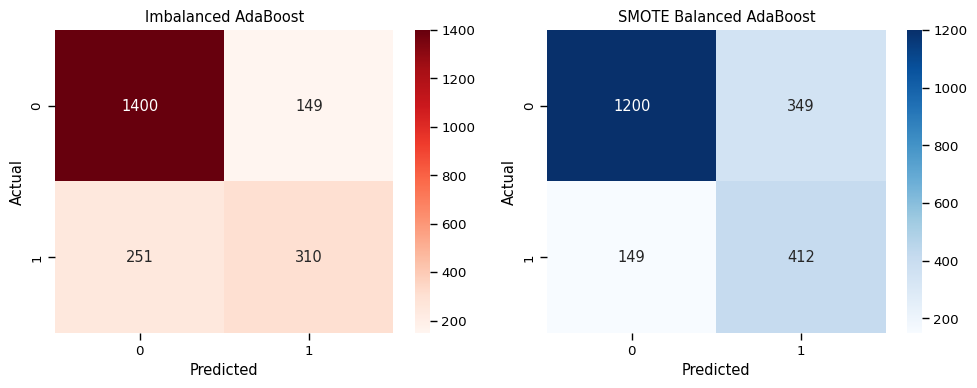

In [ ]:
#Comparing Imbalanced vs Balanced (SMOTE) AdaBoost Classifier

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Train AdaBoost on imbalanced data
a_model_imbalanced = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=1,
    random_state=42
)
a_model_imbalanced.fit(X_train, y_train)
a_preds_imbalanced = a_model_imbalanced.predict(X_test)
a_probs_imbalanced = a_model_imbalanced.predict_proba(X_test)[:, 1]

# Step 2: Apply SMOTE to balance training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Step 3: Train AdaBoost on balanced data
a_model_balanced = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=1,
    random_state=42
)
a_model_balanced.fit(X_train_res, y_train_res)
a_preds_balanced = a_model_balanced.predict(X_test)
a_probs_balanced = a_model_balanced.predict_proba(X_test)[:, 1]

# Step 4: Collect metrics and support info
support_counts = pd.Series(y_test).value_counts().to_dict()  # Check balance in test data

metrics_dict = {
    "Model": ["Imbalanced AdaBoost", "Balanced (SMOTE) AdaBoost"],
    "Accuracy": [
        accuracy_score(y_test, a_preds_imbalanced),
        accuracy_score(y_test, a_preds_balanced)
    ],
    "Precision": [
        precision_score(y_test, a_preds_imbalanced),
        precision_score(y_test, a_preds_balanced)
    ],
    "Recall": [
        recall_score(y_test, a_preds_imbalanced),
        recall_score(y_test, a_preds_balanced)
    ],
    "F1-Score": [
        f1_score(y_test, a_preds_imbalanced),
        f1_score(y_test, a_preds_balanced)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, a_probs_imbalanced),
        roc_auc_score(y_test, a_probs_balanced)
    ],
    "Support (No Churn)": [support_counts.get(0, 0)] * 2,
    "Support (Churn)": [support_counts.get(1, 0)] * 2
}

df_compare = pd.DataFrame(metrics_dict)
df_compare = df_compare.round(4)

# Step 5: Display comparison
print("\n🔍 Model Comparison (Including Support Counts):\n")
print(df_compare)

# Step 6: Visualization - Comparison of Metrics
plt.figure(figsize=(9, 5))
sns.barplot(
    data=df_compare.melt(id_vars="Model", var_name="Metric", value_name="Score"),
    x="Metric", y="Score", hue="Model", palette="coolwarm"
)
plt.title("Imbalanced vs SMOTE AdaBoost Model Comparison", fontsize=14)
plt.ylim(0, 1)
plt.legend(title="Model", loc="lower right")
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 7: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test, a_preds_imbalanced),
            annot=True, fmt="d", cmap="Reds", ax=axes[0])
axes[0].set_title("Imbalanced AdaBoost")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, a_preds_balanced),
            annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("SMOTE Balanced AdaBoost")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


### **Key Takeaway**

After applying SMOTE, your model became:

* Less biased toward majority class (non-churners)

* Better at catching real churners (higher recall)

* Still maintains strong AUC and overall predictive strength

 **Trade-off:** slightly more false alarms (lower precision), which is usually acceptable in churn analysis — because catching potential churners early is more valuable than missing them.

### ***Handing imbalances (Random Forest Classifier)***


📊 Random Forest Model Comparison:

                        Model  Accuracy  Precision    Recall  F1-Score  \
0               Imbalanced RF  0.813270   0.707196  0.508021  0.591286   
2         Balanced RF (SMOTE)  0.772038   0.552632  0.748663  0.635882   
1  Balanced RF (class_weight)  0.756872   0.527523  0.819964  0.642010   

    ROC-AUC  Support (No Churn)  Support (Churn)  
0  0.859698              1549.0            561.0  
2  0.847184              1549.0            561.0  
1  0.858988              1549.0            561.0  


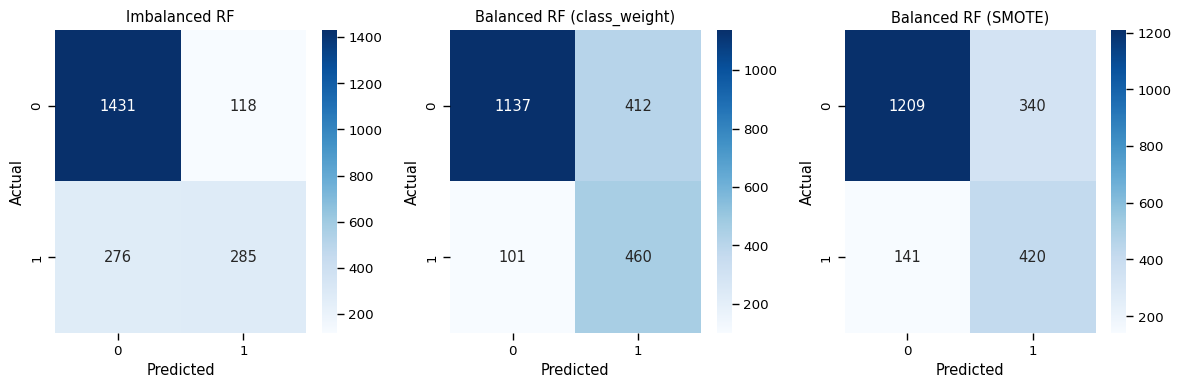

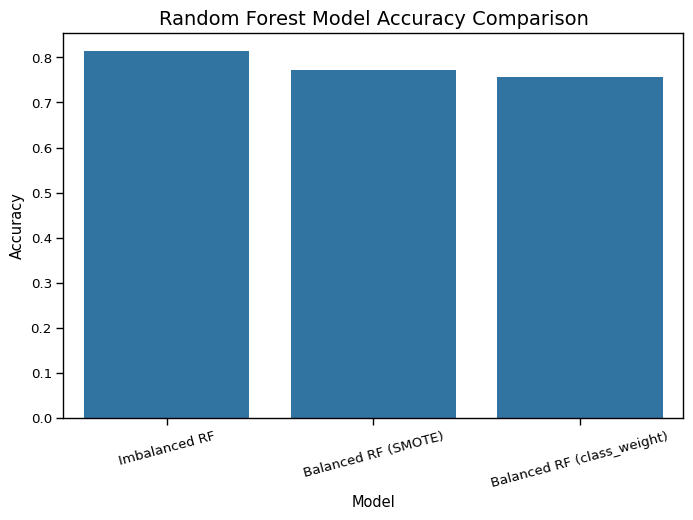

In [ ]:
#Comparing Imbalanced vs Balanced (class_weight) vs SMOTE Random Forest Classifier


# ✅ Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================
# 1️⃣ Imbalanced Random Forest
# ============================
rf_imbalanced = RandomForestClassifier(
    n_estimators=1000,
    oob_score=True,
    n_jobs=-1,
    random_state=50,
    max_features="sqrt",
    max_leaf_nodes=30
)
rf_imbalanced.fit(X_train, y_train)
rf_pred_imb = rf_imbalanced.predict(X_test)
rf_pred_prob_imb = rf_imbalanced.predict_proba(X_test)[:, 1]

report_imb = metrics.classification_report(y_test, rf_pred_imb, output_dict=True)
roc_auc_imb = roc_auc_score(y_test, rf_pred_prob_imb)

# ============================
# 2️⃣ Balanced Random Forest (class_weight)
# ============================
rf_balanced = RandomForestClassifier(
    n_estimators=1000,
    oob_score=True,
    n_jobs=-1,
    random_state=50,
    max_features="sqrt",
    max_leaf_nodes=30,
    class_weight='balanced'
)
rf_balanced.fit(X_train, y_train)
rf_pred_bal = rf_balanced.predict(X_test)
rf_pred_prob_bal = rf_balanced.predict_proba(X_test)[:, 1]

report_bal = metrics.classification_report(y_test, rf_pred_bal, output_dict=True)
roc_auc_bal = roc_auc_score(y_test, rf_pred_prob_bal)

# ============================
# 3️⃣ SMOTE + Random Forest
# ============================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(
    n_estimators=1000,
    oob_score=True,
    n_jobs=-1,
    random_state=50,
    max_features="sqrt",
    max_leaf_nodes=30
)
rf_smote.fit(X_train_res, y_train_res)
rf_pred_smote = rf_smote.predict(X_test)
rf_pred_prob_smote = rf_smote.predict_proba(X_test)[:, 1]

report_smote = metrics.classification_report(y_test, rf_pred_smote, output_dict=True)
roc_auc_smote = roc_auc_score(y_test, rf_pred_prob_smote)

# ============================
# 4️⃣ Create Comparison Table
# ============================
results = pd.DataFrame({
    "Model": ["Imbalanced RF", "Balanced RF (class_weight)", "Balanced RF (SMOTE)"],
    "Accuracy": [
        metrics.accuracy_score(y_test, rf_pred_imb),
        metrics.accuracy_score(y_test, rf_pred_bal),
        metrics.accuracy_score(y_test, rf_pred_smote)
    ],
    "Precision": [
        report_imb["1"]["precision"],
        report_bal["1"]["precision"],
        report_smote["1"]["precision"]
    ],
    "Recall": [
        report_imb["1"]["recall"],
        report_bal["1"]["recall"],
        report_smote["1"]["recall"]
    ],
    "F1-Score": [
        report_imb["1"]["f1-score"],
        report_bal["1"]["f1-score"],
        report_smote["1"]["f1-score"]
    ],
    "ROC-AUC": [
        roc_auc_imb,
        roc_auc_bal,
        roc_auc_smote
    ],
    "Support (No Churn)": [
        report_imb["0"]["support"],
        report_bal["0"]["support"],
        report_smote["0"]["support"]
    ],
    "Support (Churn)": [
        report_imb["1"]["support"],
        report_bal["1"]["support"],
        report_smote["1"]["support"]
    ]
}).sort_values(by="Accuracy", ascending=False)

print("\n📊 Random Forest Model Comparison:\n")
print(results)

# ============================
# 5️⃣ Confusion Matrices
# ============================
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ["Imbalanced RF", "Balanced RF (class_weight)", "Balanced RF (SMOTE)"]
preds = [rf_pred_imb, rf_pred_bal, rf_pred_smote]

for i, ax in enumerate(axes):
    sns.heatmap(confusion_matrix(y_test, preds[i]), annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# ============================
# 6️⃣ Model Comparison Chart
# ============================
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results)
plt.title("Random Forest Model Accuracy Comparison", fontsize=14)
plt.xticks(rotation=15)
plt.show()


This table compares the performance of three Random Forest models for predicting customer churn, highlighting the impact of different strategies for handling class imbalance.

* The **Imbalanced RF model** is the most **accurate overall** (81.3% Accuracy) and has the best ability to discriminate (AUC of 0.860) but suffers from the **lowest Recall (50.8%)**, missing nearly half of the actual churners.
* The models using balancing techniques successfully **prioritize identifying churners**, with the **Balanced RF (class\_weight)** achieving the **highest Recall (82.0%)**.
* This increase in Recall, however, comes at the expense of lower **Accuracy** and **Precision**, as these models generate more false alarms (predicting churn when none occurs).

In essence, there's a clear trade-off: The imbalanced model is best for **overall correctness**, while the balanced models excel at **capturing the most churners** at the cost of higher false positive rates.

### ***Handing imbalances (XG-Boost Classifier)***

c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[09:41:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[09:41:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\damie\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[09:41:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





📊 XGBoost Model Comparison:

                                 Model  Accuracy  Precision    Recall  \
0                   Imbalanced XGBoost  0.793365   0.629938  0.540107   
2             Balanced XGBoost (SMOTE)  0.763033   0.547287  0.629234   
1  Balanced XGBoost (scale_pos_weight)  0.752133   0.523515  0.754011   

   F1-Score   ROC-AUC  Support (No Churn)  Support (Churn)  
0  0.581574  0.844981              1549.0            561.0  
2  0.585406  0.830368              1549.0            561.0  
1  0.617969  0.842740              1549.0            561.0  


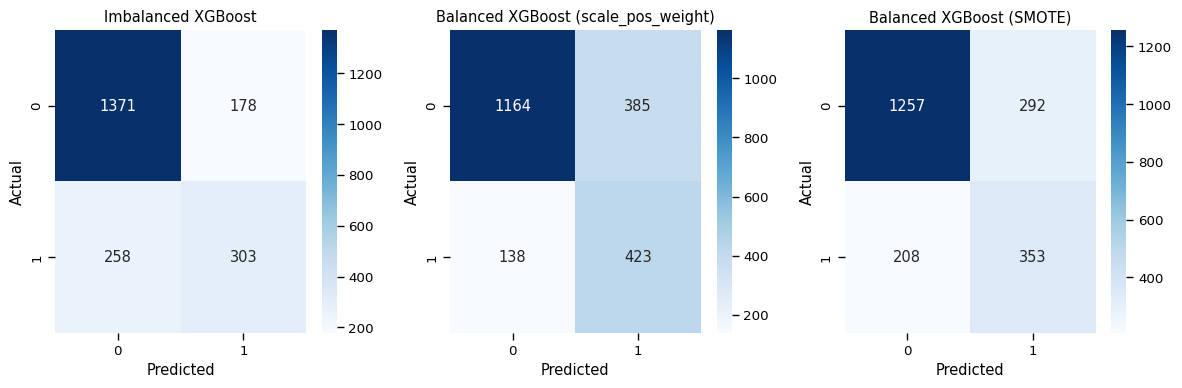

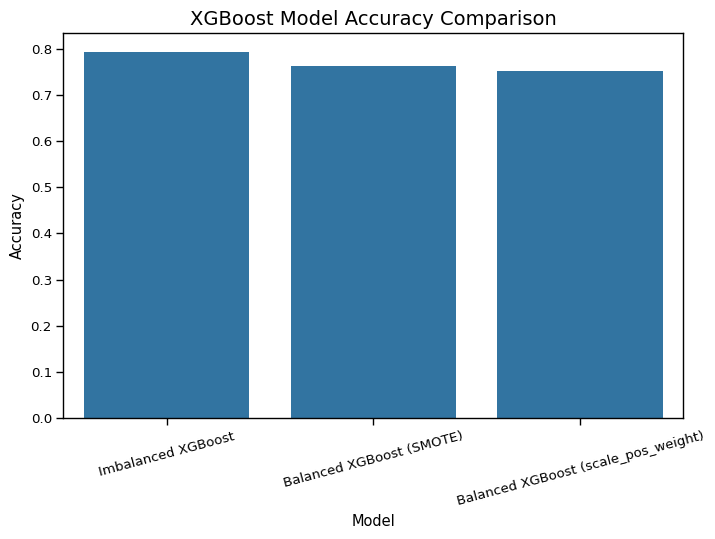

In [143]:
# ✅ Imports
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================
# 1️⃣ Imbalanced XGBoost
# ============================
xgb_imbalanced = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_imbalanced.fit(X_train, y_train)
xgb_pred_imb = xgb_imbalanced.predict(X_test)
xgb_pred_prob_imb = xgb_imbalanced.predict_proba(X_test)[:, 1]

report_imb = classification_report(y_test, xgb_pred_imb, output_dict=True)
roc_auc_imb = roc_auc_score(y_test, xgb_pred_prob_imb)

# ============================
# 2️⃣ Balanced XGBoost (scale_pos_weight)
# ============================
# scale_pos_weight = (number of negative samples) / (number of positive samples)
scale = pd.Series(y_train).value_counts()[0] / pd.Series(y_train).value_counts()[1]

xgb_balanced = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale
)
xgb_balanced.fit(X_train, y_train)
xgb_pred_bal = xgb_balanced.predict(X_test)
xgb_pred_prob_bal = xgb_balanced.predict_proba(X_test)[:, 1]

report_bal = classification_report(y_test, xgb_pred_bal, output_dict=True)
roc_auc_bal = roc_auc_score(y_test, xgb_pred_prob_bal)

# ============================
# 3️⃣ SMOTE + XGBoost
# ============================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

xgb_smote = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_smote.fit(X_train_res, y_train_res)
xgb_pred_smote = xgb_smote.predict(X_test)
xgb_pred_prob_smote = xgb_smote.predict_proba(X_test)[:, 1]

report_smote = classification_report(y_test, xgb_pred_smote, output_dict=True)
roc_auc_smote = roc_auc_score(y_test, xgb_pred_prob_smote)

# ============================
# 4️⃣ Combine Results
# ============================
results = pd.DataFrame({
    "Model": ["Imbalanced XGBoost", "Balanced XGBoost (scale_pos_weight)", "Balanced XGBoost (SMOTE)"],
    "Accuracy": [
        accuracy_score(y_test, xgb_pred_imb),
        accuracy_score(y_test, xgb_pred_bal),
        accuracy_score(y_test, xgb_pred_smote)
    ],
    "Precision": [
        report_imb["1"]["precision"],
        report_bal["1"]["precision"],
        report_smote["1"]["precision"]
    ],
    "Recall": [
        report_imb["1"]["recall"],
        report_bal["1"]["recall"],
        report_smote["1"]["recall"]
    ],
    "F1-Score": [
        report_imb["1"]["f1-score"],
        report_bal["1"]["f1-score"],
        report_smote["1"]["f1-score"]
    ],
    "ROC-AUC": [
        roc_auc_imb,
        roc_auc_bal,
        roc_auc_smote
    ],
    "Support (No Churn)": [
        report_imb["0"]["support"],
        report_bal["0"]["support"],
        report_smote["0"]["support"]
    ],
    "Support (Churn)": [
        report_imb["1"]["support"],
        report_bal["1"]["support"],
        report_smote["1"]["support"]
    ]
}).sort_values(by="Accuracy", ascending=False)

print("\n📊 XGBoost Model Comparison:\n")
print(results)

# ============================
# 5️⃣ Confusion Matrices
# ============================
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ["Imbalanced XGBoost", "Balanced XGBoost (scale_pos_weight)", "Balanced XGBoost (SMOTE)"]
preds = [xgb_pred_imb, xgb_pred_bal, xgb_pred_smote]

for i, ax in enumerate(axes):
    sns.heatmap(confusion_matrix(y_test, preds[i]), annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# ============================
# 6️⃣ Accuracy Bar Chart
# ============================
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results)
plt.title("XGBoost Model Accuracy Comparison", fontsize=14)
plt.xticks(rotation=15)
plt.show()


This comparison of three **XGBoost** models for churn prediction shows the impact of class balancing on performance metrics.

* The **Imbalanced XGBoost** is the **most accurate (79.3% Accuracy)**, and has the best **Precision (0.630)** and **ROC-AUC (0.845)**. Its weakness is the **lowest Recall (54.0%)**, meaning it misses almost half of the actual churn cases.
* The balancing methods successfully shift the focus to the minority class: the **Balanced XGBoost (scale\_pos\_weight)** achieves the **highest Recall (75.4%)** and **best F1-Score (0.618)**.
* This high sensitivity comes with a cost: it has the **lowest Accuracy (75.2%)** and **Precision (0.524)**, indicating it raises more false alarms (predicts churn incorrectly).

In short, the choice is between the imbalanced model for **overall reliability and minimizing false alarms**, or a balanced model for **maximizing the identification of actual churners**.